In [1]:
# !pip install selenium
import pandas as pd
import numpy as np
import re

import requests 

import datetime
%matplotlib inline
import matplotlib.pyplot as plt


from bs4 import BeautifulSoup
from selenium import webdriver



In [2]:
base_url = 'https://search.shopping.naver.com/detail/detail.nhn?nv_mid=16201048296'
print(base_url)

https://search.shopping.naver.com/detail/detail.nhn?nv_mid=16201048296


In [3]:
res = requests.get(base_url)
res.encoding='utf-8'

In [4]:
res.status_code

200

In [5]:
soup = BeautifulSoup(res.text, 'html.parser')

In [6]:
output_raw = soup.find(name='div', attrs ={'class':'detail_descript'}) ##상위 클래스인 div에서 detailscript 부분
output = output_raw.find_all(name='tr', attrs={'class':'_itemSection'}) ##하위 클래스가 itemsection(제품이름 부분)인거 다 찾음

In [7]:
#LG 퓨리케어 제품에 대한 쇼핑몰 별 최저가 및 혜택 DataFrame에 저장.
df = pd.DataFrame()
for indi in output:
    dict_data = {}
    for ind, tds in enumerate(indi.find_all('td')):##반복문 사용 시 몇 번째 반복문인지 확인이 필요할 수 있음. 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환.
        
        if ind == 0:
            a_tag = tds.find('a')
            dict_data['mall_name'] = a_tag.attrs['data-mall-name'] ##뒤에거가 html코드 보고 가져오는거
            dict_data['mall_seq'] = a_tag.attrs['data-mall-seq']
            dict_data['mall_grade'] = a_tag.attrs['data-mall-grade']


        elif ind == 1:
            # product name
            a_tag = tds.find('a')
            dict_data['product_name']= a_tag.text 
            
            # gift
            p_tag = tds.find('p')
            dict_data['gift'] = p_tag.find('em').text.strip()
            
            # mall_info
       #     div_tag = tds.find('div')
       #     mall_info = div_tag.find('a', attrs={'class':'_btn_mall_detail _noadd'})
       #     dict_data['mall_adress'] = mall_info.attrs['data-address']
       #     dict_data['mall_grade2'] = mall_info.attrs['data-mall-grade']
       #     dict_data['mall_url'] = mall_info.attrs['data-mall-url']
        elif ind == 2:
            a_tag = tds.find('a')
            dict_data['price_updated_at'] = a_tag.attrs['data-rcv-date'][:-1]
            dict_data['price'] = int(a_tag.find('span').text.replace(',',''))
            dict_data['is_lowest_price'] = True if a_tag.find('em') else False
        elif ind == 3:
            p_tag = tds.find('p')
            dict_data['delivery_fee'] = p_tag.text
        elif ind == 4:
            # benefits
            p_tag = tds.find('p')
            dict_data['benefits'] = p_tag.text.strip() if len(tds.find_all('p')) > 0 else None
            
    df = df.append(dict_data, ignore_index=True)

In [8]:
df

,benefits,delivery_fee,gift,is_lowest_price,mall_grade,mall_name,mall_seq,price,price_updated_at,product_name
0,None,무료배송,[신한/KB국민/현대 100만원 이상 SK pay 결제 시 최대 22개월 무이자] ...,1.0,M44001,11번가,17703,1012380.0,2019.11.23,(GP) LG전자 AS309DWA 공기청정기 퓨리케어
1,"네이버페이 포인트 10,124원",무료배송,최대 6% 카드 청구할인 / 카드사별 2~6개월 무이자 혜택,0.0,M44001,인터파크,3,1012390.0,2019.11.23,AS309DWA ㅇLG퓨리케어 공기청정기 주말배송 사다리차
2,None,무료배송,[KB국민/현대/신한 스마일페이 100만원 이상 결제 시 최대 20개월 무이자] [...,0.0,M44001,옥션,114,1013380.0,2019.11.23,AS309DWA ㅇLG퓨리케어 공기청정기 주말배송 사다리차
3,None,무료배송,[KB국민/현대/신한 스마일페이 100만원 이상 결제 시 최대 20개월 무이자] [...,0.0,M44001,옥션,114,1013410.0,2019.11.23,퓨리케어 (GP) LG전자 AS309DWA 공기청정기 퓨리케어
4,None,무료배송,[KB국민/현대/신한 스마일페이 100만원 이상 결제 시 최대 20개월 무이자] [...,0.0,M44001,옥션,114,1017400.0,2019.11.23,퓨리케어 블루스타 공기청정기 클린부스터 AS309DWA
5,None,무료배송,[KB국민/현대/신한 스마일페이 100만원 이상 결제 시 최대 20개월 무이자] [...,0.0,M44001,옥션,114,1019040.0,2019.11.23,아이엠판다 / AS309DWA / 전국배송설치
6,None,무료배송,[신한/KB국민/현대 100만원 이상 SK pay 결제 시 최대 22개월 무이자] ...,0.0,M44001,11번가,17703,1021370.0,2019.11.23,블루스타 LG 퓨리케어 공기청정기 AS309DWA 당일발송
7,None,무료배송,[KB국민/현대/신한 스마일페이 100만원 이상 결제 시 최대 20개월 무이자] [...,0.0,M44001,G마켓,24,1021770.0,2019.11.23,아이엠판다 / AS309DWA / 전국배송설치
8,None,무료배송,[KB국민/현대/신한 스마일페이 100만원 이상 결제 시 최대 20개월 무이자] [...,0.0,M44001,G마켓,24,1021780.0,2019.11.23,퓨리케어 (GP) LG전자 AS309DWA 공기청정기 퓨리케어
9,None,무료배송,[KB국민/현대/신한 스마일페이 100만원 이상 결제 시 최대 20개월 무이자] [...,0.0,M44001,G마켓,24,1025770.0,2019.11.23,퓨리케어 블루스타 공기청정기 클린부스터 AS309DWA


In [9]:
#쇼핑몰 별 리뷰 정보
review_raw = soup.find(name='ul', attrs ={'class':'lst_review'})
reviews = review_raw.find_all(name='li', attrs={'class':'thumb_nail'})

df_review = pd.DataFrame()
for indi_review in reviews:
    dict_data = {}
    stars = indi_review.select('div.atc_area > div.avg_area > a > span.curr_avg')
    dict_data['star'] = stars[0].text
    
    info = indi_review.select('div.atc_area > div.avg_area > span.info > span.info_cell')
    for ind, indi_info in enumerate(info):
        if ind == 0:
            dict_data['info_mall'] = indi_info.text.strip()
        elif ind == 1:
            dict_data['info_user_id'] = indi_info.text.strip()
        elif ind == 2:
            dict_data['info_date'] = indi_info.text[:-1].strip()            

    review_text = indi_review.select('div.atc_area > div.atc')
    dict_data['review'] = review_text[0].text
    
    pictures = indi_review.select('div.atc_area > div.thmb > span.img_box')
    dict_data['pictures'] = len(pictures)
    
    df_review = df_review.append(dict_data, ignore_index = True)

In [10]:
df_review

,info_date,info_mall,info_user_id,pictures,review,star
0,19.07.06,빅스타0405,wldn****,4.0,주문하고 3일만에 받았어요.Lg기사님이 직접 방문설치 해주시고 필터1회 서비스 받는...,5
1,19.11.18,신세계몰,kh******,0.0,기존 w회사 제품을 렌탈사용하다.좀더 큰 용량의 제품인 LG 퓨리케어 ...,5
2,19.07.27,CJmall,poi*****,2.0,드디어 벼르고 벼르던 공기청정기를 들였네요. LG퓨리케어 듀얼 AS309DWA 이 ...,5
3,19.07.05,빅스타0405,geun****,4.0,"하루만에 받았구요, 지난3월에 다른곳에서 주문했다 한달기다려도 연락없어 취소하고 다...",5
4,19.08.04,신세계몰,rl******,0.0,1주일 조금 지난 후기입니다..사진처럼 크기는 생각보다 큼니다!!처음 사면서부터 어...,5
5,19.04.22,인터파크,chul****,3.0,5주 걸리다고 했는데 1주 조금 넘어서 온듯합니다. 퓨리는 워낙들 날리라^^똑똑한칭...,5
6,19.05.13,G마켓,isee****,1.0,마님이 선택하는바람에 괜시리 토 달았다가 나중에 원망 듣기 싫어서 바로 이걸로 구매...,5
7,18.11.19,현대Hmall,kt******,1.0,카드할인과 포인트사용등으로 가장 최저가로 구입가능하여 구입하였습니다.LG기사님이 가...,5
8,19.04.02,CJmall,ben*****,3.0,2주동안 청정기없이 지냈는데 집안 공기가 안좋았더라고요.공기질 모니터링하는 걸 샀는...,5
9,19.04.06,GSSHOP,ane*****,1.0,3월 미세먼지가 극성이여서 가족 건강을 위해 주문을 하였습니다. 집안이라 그런지 미...,4


In [11]:
#가격정보 가져와 DataFrame에 저장하는 과정을 메소드화함.
def get_price_data(soup):
    output_raw = soup.find(name='div', attrs ={'class':'detail_descript'})
    output = output_raw.find_all(name='tr', attrs={'class':'_itemSection'})

    df = pd.DataFrame()
    for indi in output:
        dict_data = {}
        for ind, tds in enumerate(indi.find_all('td')):
            if ind == 0:
                a_tag = tds.find('a')
                dict_data['mall_name'] = a_tag.attrs['data-mall-name']
                dict_data['mall_seq'] = a_tag.attrs['data-mall-seq']
                dict_data['mall_grade'] = a_tag.attrs['data-mall-grade']

            elif ind == 1:
                # product name
                a_tag = tds.find('a')
                dict_data['product_name']= a_tag.text 

                # gift
                p_tag = tds.find('p')
                dict_data['gift'] = p_tag.find('em').text.strip()

                # mall_info
              #  div_tag = tds.find('div')
              #  mall_info = div_tag.find('a', attrs={'class':'_btn_mall_detail _noadd'})
              #  dict_data['mall_adress'] = mall_info.attrs['data-address']
              #  dict_data['mall_grade2'] = mall_info.attrs['data-mall-grade']
              #  dict_data['mall_url'] = mall_info.attrs['data-mall-url']
            elif ind == 2:
                a_tag = tds.find('a')
                dict_data['price_updated_at'] = a_tag.attrs['data-rcv-date'][:-1]
                dict_data['price'] = int(a_tag.find('span').text.replace(',',''))
                dict_data['is_lowest_price'] = True if a_tag.find('em') else False
            elif ind == 3:
                p_tag = tds.find('p')
                dict_data['delivery_fee'] = p_tag.text
            elif ind == 4:
                # benefits
                p_tag = tds.find('p')
                dict_data['benefits'] = p_tag.text.strip() if len(tds.find_all('p')) > 0 else None

        df = df.append(dict_data, ignore_index=True)
    
    return df



In [12]:
#리뷰 데이터 가져와 저장하는 과정을 메소드화함.
def get_review_data(soup):
    review_raw = soup.find(name='ul', attrs ={'class':'lst_review'})
    reviews = review_raw.find_all(name='li', attrs={'class':'thumb_nail'})

    df_review = pd.DataFrame()
    for indi_review in reviews:
        dict_data = {}
        stars = indi_review.select('div.atc_area > div.avg_area > a > span.curr_avg')
        dict_data['star'] = stars[0].text

        info = indi_review.select('div.atc_area > div.avg_area > span.info > span.info_cell')
        for ind, indi_info in enumerate(info):
            if ind == 0:
                dict_data['info_mall'] = indi_info.text.strip()
            elif ind == 1:
                dict_data['info_user_id'] = indi_info.text.strip()
            elif ind == 2:
                dict_data['info_date'] = indi_info.text[:-1].strip()            

        review_text = indi_review.select('div.atc_area > div.atc')
        dict_data['review'] = review_text[0].text

        pictures = indi_review.select('div.atc_area > div.thmb > span.img_box')
        dict_data['pictures'] = len(pictures)

        df_review = df_review.append(dict_data, ignore_index = True)
    
    return df_review

In [13]:
#크롬 드라이버로 해당 페이지 들어가는 과정.
driver = webdriver.Chrome('C:/Users/g9016/191122/chromedriver.exe')
driver.implicitly_wait(3)

In [14]:
driver.get(base_url)
driver.implicitly_wait(3)

In [15]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [16]:
#가격정보, 리뷰정보 페이지 수 파악.
onclick_function_str = soup.find('div', attrs={'id':'_price_list_paging'}).find_all('a')[-1].attrs['onclick']
max_price_page = int(re.search(r".page\((.*?), '_price_list_paging'", onclick_function_str).group(1))
print(max_price_page)
onclick_function_str = soup.find('div', attrs={'id':'_review_paging'}).find_all('a')[-1].attrs['onclick']
max_review_page = int(re.search(r".page\((.*?), '_review_paging'", onclick_function_str).group(1))
print(max_review_page)

16
180


In [17]:
output_df = pd.DataFrame()
i = 0
page_count = 1
#페이지 끝까지 하나씩 순차적으로 넘김.
while True:
    if page_count > max_price_page+1:
        break
        
    try:
        page_button = driver.find_element_by_xpath('//*[@id="_price_list_paging"]/a[{page}]'.format(page=i))
        attr = page_button.get_attribute('class')
        
        if attr not in ['pre','pre_end','next_end']:
            page_button.click()
            page_count += 1
            
            if attr == 'next':
                i = 3
            else:
                i += 1

    except:
        i += 1
        page_count += 1
    
    driver.implicitly_wait(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    output_df = output_df.append(get_price_data(soup), ignore_index=True)

In [18]:
len(output_df)

337

In [19]:
review_df = pd.DataFrame()
i = 0
page_count = 1

while True:
    if page_count > max_review_page+1:
        break
        
    try:
        page_button = driver.find_element_by_xpath('//*[@id="_review_paging"]/a[{page}]'.format(page=i))
        attr = page_button.get_attribute('class')
        
        if attr not in ['pre','pre_end','next_end']:
            page_button.click()
            page_count += 1
            
            if attr == 'next':
                i = 3
            else:
                i += 1
    except:
        i += 1
        page_count += 1
    
    driver.implicitly_wait(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    review_df = review_df.append(get_review_data(soup), ignore_index=True)
    
    

In [20]:
review_df

,info_date,info_mall,info_user_id,pictures,review,star
0,19.07.06,빅스타0405,wldn****,4.0,주문하고 3일만에 받았어요.Lg기사님이 직접 방문설치 해주시고 필터1회 서비스 받는...,5
1,19.11.18,신세계몰,kh******,0.0,기존 w회사 제품을 렌탈사용하다.좀더 큰 용량의 제품인 LG 퓨리케어 ...,5
2,19.07.27,CJmall,poi*****,2.0,드디어 벼르고 벼르던 공기청정기를 들였네요. LG퓨리케어 듀얼 AS309DWA 이 ...,5
3,19.07.05,빅스타0405,geun****,4.0,"하루만에 받았구요, 지난3월에 다른곳에서 주문했다 한달기다려도 연락없어 취소하고 다...",5
4,19.08.04,신세계몰,rl******,0.0,1주일 조금 지난 후기입니다..사진처럼 크기는 생각보다 큼니다!!처음 사면서부터 어...,5
...,...,...,...,...,...,...
3615,19.03.19,GSSHOP,su******,0.0,열심히쓰고있습니다.,5
3616,19.03.22,11번가,jc******,0.0,원하는 시간대에 설치해 주셔서 감사합니다~ 잘 사용하고 있습니다~~^^,5
3617,19.03.10,하이마트쇼핑몰,je******,0.0,따로 많이 알아보지 않고 그냥 엘지 제품 중에 제일 비싼놈으로 샀어요. 부모님 집에...,5
3618,19.03.28,J . 몰,jang****,0.0,친절한 배송 감사합니다.,5


In [77]:
reviews = review_df.copy()

In [89]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620 entries, 0 to 3619
Data columns (total 6 columns):
info_date       3620 non-null object
info_mall       3620 non-null object
info_user_id    3620 non-null object
pictures        3620 non-null float64
review          3620 non-null object
star            3620 non-null int8
dtypes: float64(1), int8(1), object(4)
memory usage: 145.1+ KB


In [79]:
reviews.head()

,info_date,info_mall,info_user_id,pictures,review,star
0,19.07.06,빅스타0405,wldn****,4.0,주문하고 3일만에 받았어요.Lg기사님이 직접 방문설치 해주시고 필터1회 서비스 받는...,5
1,19.11.18,신세계몰,kh******,0.0,기존 w회사 제품을 렌탈사용하다.좀더 큰 용량의 제품인 LG 퓨리케어 ...,5
2,19.07.27,CJmall,poi*****,2.0,드디어 벼르고 벼르던 공기청정기를 들였네요. LG퓨리케어 듀얼 AS309DWA 이 ...,5
3,19.07.05,빅스타0405,geun****,4.0,"하루만에 받았구요, 지난3월에 다른곳에서 주문했다 한달기다려도 연락없어 취소하고 다...",5
4,19.08.04,신세계몰,rl******,0.0,1주일 조금 지난 후기입니다..사진처럼 크기는 생각보다 큼니다!!처음 사면서부터 어...,5


In [88]:
#평균, 표준편차 구해보기 위해 데이터타입 변환.
reviews['star'] = reviews['star'].astype('int8')

In [90]:
#데이터 groupby로 집계.
mall_groupped = reviews.groupby(by='info_mall')
mall_count = mall_groupped.count()['review'].rename('n_reviews')
mall_mean_star = mall_groupped.mean()['star'].rename('star_mean')
mall_std_star = mall_groupped.std()['star'].rename('star_std')

In [91]:
mall_concat = pd.concat([mall_count,mall_mean_star, mall_std_star],axis=1)
mall_concat

,n_reviews,star_mean,star_std
info_mall,,,
11번가,184,4.885870,0.366666
CJmall,186,4.763441,0.474150
E마켓,3,4.666667,0.577350
GSSHOP,1371,4.829322,0.456951
G마켓,142,4.654930,0.781395
HS글로벌09,2,4.000000,1.414214
ITPLUS,10,4.700000,0.483046
J . 몰,32,4.968750,0.176777
SSG닷컴,132,5.000000,0.000000


In [92]:
mall_concat.corr()#데이터 간 상관성 파악.

,n_reviews,star_mean,star_std
n_reviews,1.000000,0.126518,0.022244
star_mean,0.126518,1.000000,-0.947124
star_std,0.022244,-0.947124,1.000000


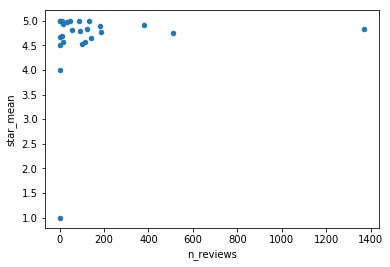

In [93]:
mall_concat.plot.scatter(x='n_reviews',y='star_mean')#리뷰의 수와 별점의 평균 상관성 가시화.

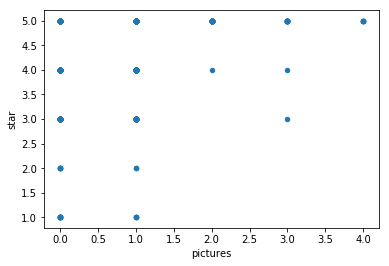

In [94]:
reviews.plot.scatter(x='pictures',y='star')#별점과 사진첨부 개수 간의 상관성 가시화.